# Image Segmentation Notebook

Image segmentation is a fundamental task in computer vision, aimed at partitioning an image into multiple segments to simplify its representation or to facilitate analysis. In this notebook, we'll explore various techniques and methodologies for performing image segmentation using Python and popular libraries such as scikit-learn and OpenCV.

The notebook will be divided into several sections, each focusing on different aspects of image segmentation. We'll start by loading and preprocessing the image data, followed by implementing different segmentation algorithms. Finally, we'll evaluate the results and discuss potential areas for improvement.

Let's dive into the fascinating world of image segmentation!


## Object Detection with Contour Detection

This code snippet demonstrates object detection using contour detection techniques. After loading the image, it converts it to grayscale and applies a simple thresholding method to create a binary mask. Contours are then detected using the binary mask, representing the boundaries of objects in the image. These contours are drawn onto the original image to visualize the detected objects. Contour detection is a commonly used technique in computer vision for object detection and shape analysis.


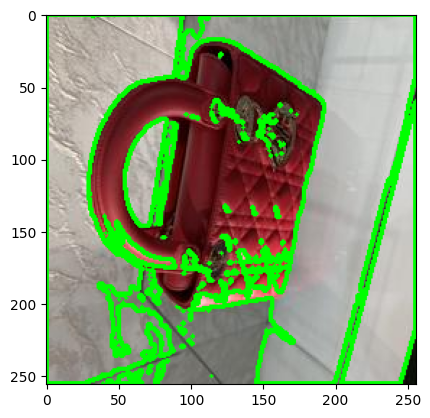

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('preprocessed_images_test/image-20210928-102713-12d2869d.jpg')



# Segmentation (using a simple example - thresholding)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Object Detection (using contour detection)
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
result_image = image.copy()
cv2.drawContours(result_image, contours, -1, (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()


## Image Segmentation using K-means Clustering

This code snippet demonstrates image segmentation using K-means clustering. Image segmentation is a process of partitioning an image into multiple segments to simplify its representation or to facilitate analysis. K-means clustering is a popular unsupervised learning algorithm used for this purpose.

The `segment_image` function takes an input image and the desired number of clusters (k) as parameters. It converts the image to RGB color space, flattens the pixel values, and applies K-means clustering to group similar pixels together. The resulting labels are then reshaped to form the segmented image.

In the example provided, the function segments the image into three clusters and plots the segmented image with a colorbar for visualization. Each cluster represents a different segment or region in the image.

K-means clustering is widely used for image segmentation due to its simplicity and effectiveness in grouping similar pixels together, making it a valuable tool in various computer vision applications.


c:\Users\oumai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


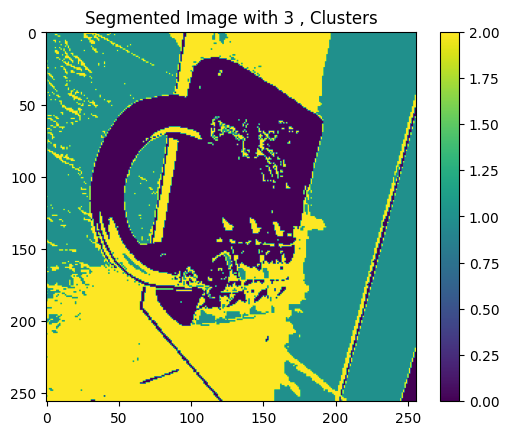

In [10]:
# Function to segment an image using clustering
# the cluster give information abt the object in the image
from sklearn.cluster import KMeans


def segment_image(image, k=2):

    # Color Space Conversion
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Flattening
    pixels = image_rgb.reshape((-1, 3))

    # K-means Clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)

    # Assign Labels
    labels = kmeans.labels_

    # Reshape to original image shape
    segmented_image = labels.reshape(image.shape[:2])

    return segmented_image
# Example and plot with 3 clusters and legends
segmented_image = segment_image(image, k=3)

# Plot the segmented image
plt.imshow(segmented_image)
plt.title('Segmented Image with 3 , Clusters')
plt.colorbar()
plt.show()



## Image Conversion to Monochrome (Grayscale)

This code snippet demonstrates the process of converting a color image to monochrome (grayscale). Monochrome images have a single channel representing the intensity of each pixel, making them simpler to process and analyze compared to color images.

The code uses the scikit-image library to perform the conversion. First, the color image is loaded using OpenCV (`cv2.imread`). Then, the `rgb2gray` function from scikit-image is applied to convert the RGB image to grayscale.

The resulting grayscale image is displayed alongside the original color image for comparison. The grayscale image is represented as a 2D array, where each pixel value represents its intensity.

Converting images to monochrome is a common preprocessing step in computer vision tasks, as it reduces the dimensionality of the data and simplifies subsequent analysis and feature extraction processes.


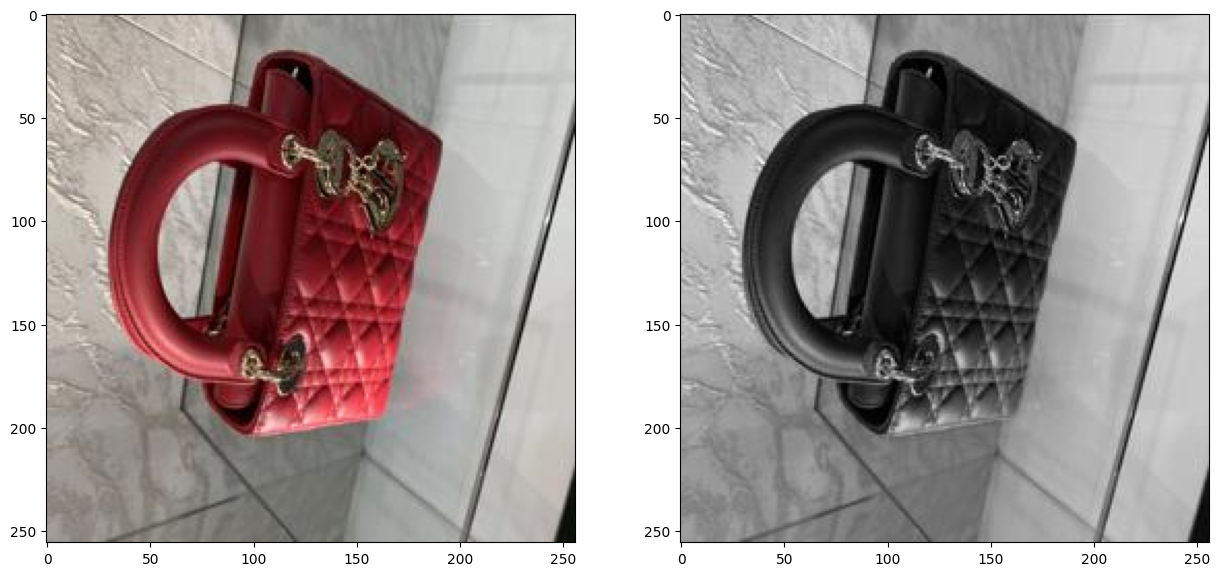

In [11]:

from skimage.color import rgb2gray,rgb2hsv


# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
image = cv2.imread('preprocessed_images_test/image-20210928-102713-12d2869d.jpg')
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Converting RGB image to Monochrome
gray_image = rgb2gray(image)
plt.subplot(1, 2, 2)

# Displaying the sample image - Monochrome
# Format
plt.imshow(gray_image, cmap="gray")


## Image Conversion to HSV Color Space

This code snippet demonstrates the process of converting a color image from the RGB color space to the HSV (Hue, Saturation, Value) color space. The HSV color space is often used in computer vision tasks due to its perceptual relevance and ability to separate color information from intensity.

The code utilizes the scikit-image library to perform the conversion. After loading the color image using OpenCV (`cv2.imread`), the `rgb2hsv` function from scikit-image is applied to convert the RGB image to the HSV color space.

The resulting HSV image is displayed alongside the original color image for comparison. The HSV image is represented in a 3D color space, where each pixel has three components: Hue, Saturation, and Value.

Additionally, a colorbar is added to the plot to represent the range of values for each component in the HSV color space. This visualization aids in understanding the distribution of colors in the image and their corresponding intensities.

Converting images to the HSV color space is beneficial for various computer vision tasks, including color-based object detection, segmentation, and image processing.


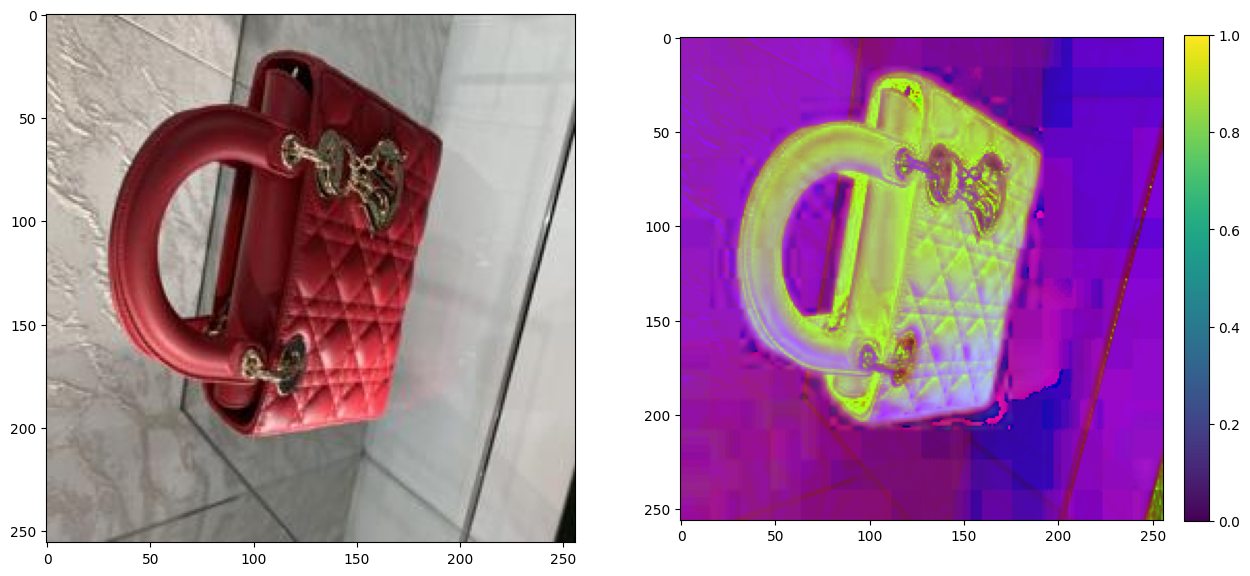

In [12]:


# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Converting RGB Image to HSV Image
hsv_image = rgb2hsv(image)
plt.subplot(1, 2, 2)

# Displaying the sample image - HSV Format
hsv_image_colorbar = plt.imshow(hsv_image)

# Adjusting colorbar to fit the size of the image
plt.colorbar(hsv_image_colorbar, fraction=0.046, pad=0.04)


## Image Binarization Techniques

This code snippet demonstrates various image binarization techniques using scikit-image. Binarization is the process of converting a grayscale image into a binary image, where each pixel is classified as either black (0) or white (1) based on a certain threshold value. Binarization is commonly used for segmenting objects from the background in images, simplifying subsequent processing tasks.

The code imports necessary libraries and sets the plot size for visualization. It then computes and displays binarized images using different thresholding techniques:

1. **Otsu's Thresholding**: Otsu's method automatically computes an optimal threshold value based on the image histogram.
2. **Niblack Thresholding**: Niblack's method computes a local threshold value for each pixel based on the mean and standard deviation of its neighborhood.
3. **Sauvola Thresholding**: Sauvola's method also computes a local threshold value for each pixel, considering the mean and standard deviation of the surrounding pixels, with additional parameters to adapt to different lighting conditions.

For each method, the code computes the binarized image and visualizes it alongside the original grayscale image. Additionally, for Sauvola's method, it displays the local threshold values before and after binarization.

Understanding and applying these binarization techniques are crucial for enhancing the quality and accuracy of image processing tasks, such as object detection and recognition, in various domains.


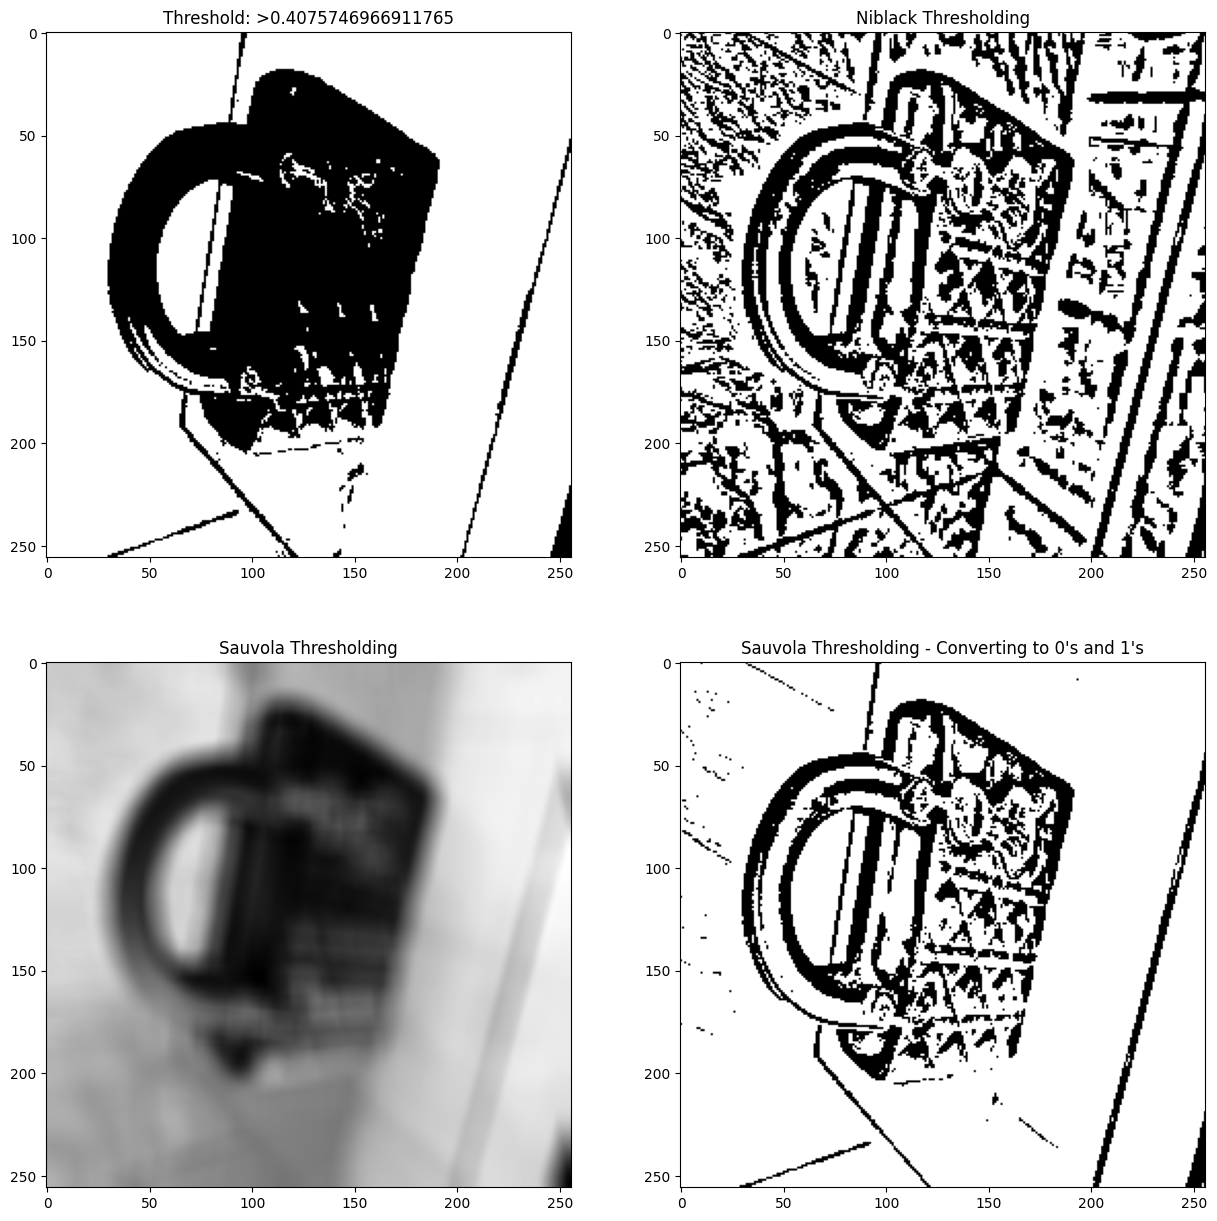

In [13]:
# Importing necessary libraries
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))


gray_image = rgb2gray(image)

# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(gray_image)

# Computing binarized values using the obtained
# threshold
binarized_image = (gray_image > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))

# Displaying the binarized image
plt.imshow(binarized_image, cmap = "gray")

# Computing Ni black's local pixel
# threshold values for every pixel
threshold = filters.threshold_niblack(gray_image)

# Computing binarized values using the obtained 
# threshold
binarized_image = (gray_image > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")

# Displaying the binarized image
plt.imshow(binarized_image, cmap = "gray")

# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
threshold = filters.threshold_sauvola(gray_image)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")

# Displaying the local threshold values
plt.imshow(threshold, cmap = "gray")

# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
binarized_image = (gray_image > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")

# Displaying the binarized image
plt.imshow(binarized_image, cmap = "gray")


## Depth Estimation using Transformers

This code snippet demonstrates depth estimation using the Transformers library. Depth estimation is a crucial task in computer vision that aims to predict the distance of objects from the camera in a given image. It finds applications in various fields, including robotics, autonomous vehicles, and augmented reality.

The code imports the necessary libraries, including the Transformers library for accessing pre-trained models. It then initializes a depth estimation pipeline using the "dpt-large" model from the Intel repository. The model is capable of predicting depth maps from input images.

The depth estimation pipeline is applied to a sample image loaded using OpenCV (`cv2.imread`). The result contains the predicted depth map for the input image, which represents the estimated depth values for each pixel.

Depth estimation using pre-trained models from Transformers provides a convenient and effective way to perform depth inference in images, facilitating the development of applications requiring depth information.


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


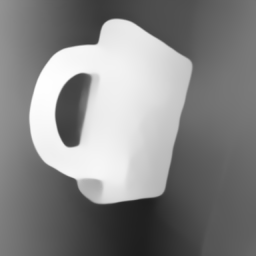

In [14]:
from transformers import pipeline
import cv2

estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")
result = estimator(images='preprocessed_images_test/image-20210928-102713-12d2869d.jpg')
result["depth"]

## Real Image Segmentation

In this section, we'll perform real image segmentation using Python scripts previously provided. The segmentation process involves various techniques such as clustering, depth detection, and transformation to hsv to partition the image into meaningful segments. We'll explore the functionality of the scripts and observe the segmentation results on sample images. Let's delve into the real segmentation process and analyze the outcomes.


In [3]:
from utils_features import load_depth_estimator, compose_features
from utils_segmentation import segment_image
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
estimator = load_depth_estimator()

config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [5]:
path = 'preprocessed_images_test/image-20210928-102713-12d2869d.jpg'
features, t = compose_features(path, estimator, shape=(256, 256), weights=[1.5, 0.2, 1, 0.1])

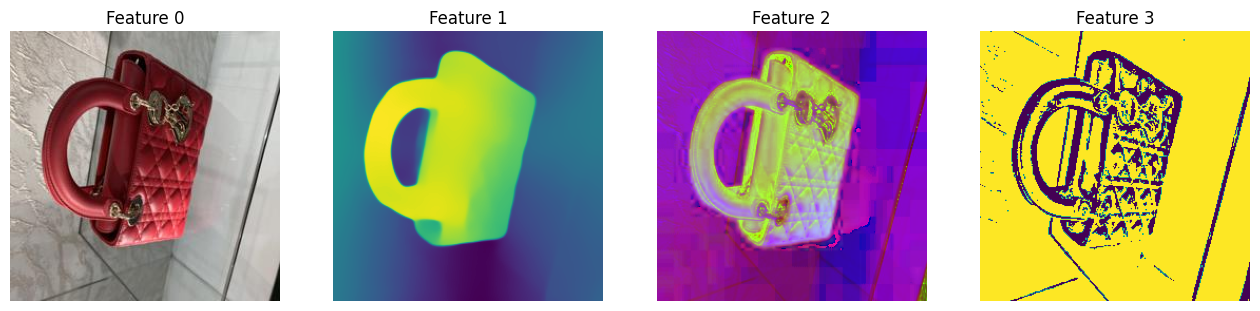

In [6]:
fig, axes = plt.subplots(1, len(t), figsize=(16, 4))

for i in range(len(t)) : 
    
    axes[i].imshow(t[i])
    axes[i].axis('off')
    axes[i].set_title(f'Feature {i}')
    
# plt.savefig('images/segmentation.png')

plt.show()

In [9]:
params = {'super_pixel':2, 'embedding_method':'spectral', 'n_components':10, 'n_neighbors':20, 'cluster_method':'knn', 'n_clusters':10, 'pos_weight':1}
labels_shaped, embedding, labels = segment_image(features, params=params)

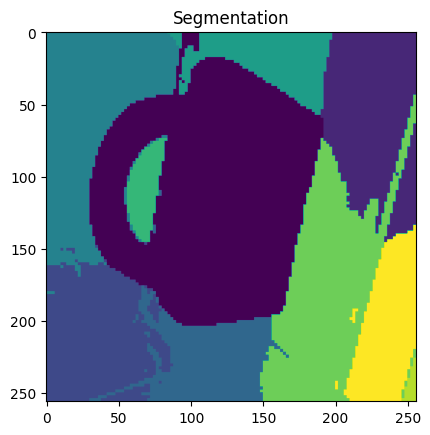

In [10]:
plt.imshow(labels_shaped)
plt.title("Segmentation")
plt.show()

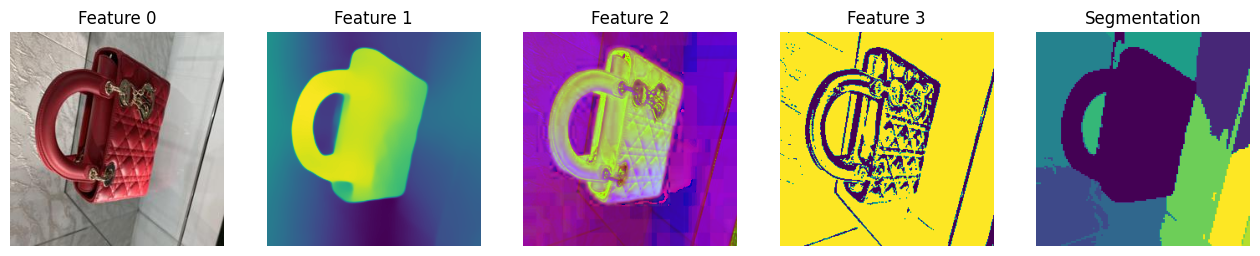

In [13]:
fig, axes = plt.subplots(1, len(t)+1, figsize=(16, 4))

for i in range(len(t)) : 
    
    axes[i].imshow(t[i])
    axes[i].axis('off')
    axes[i].set_title(f'Feature {i}')
    
axes[-1].imshow(labels_shaped)
axes[-1].axis('off')
axes[-1].set_title(f'Segmentation')
plt.savefig('images/segmentation4.png')
plt.show()

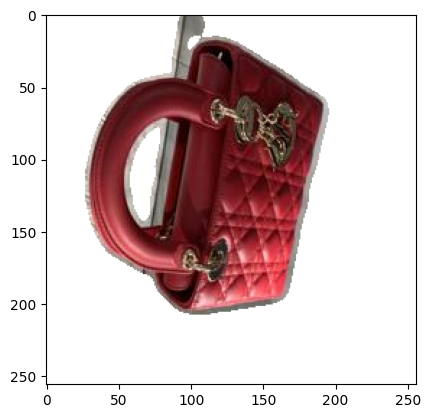

In [47]:
from scipy import signal

mask = (labels_shaped==0)
mask = signal.convolve2d(mask, np.ones((10, 10)), mode='same')
mask /= np.max(mask)

I = np.copy(t[0])
I[mask<0.2] = 255
plt.imshow(I)
plt.show()